# Amazon Reviews Web Scraping

### 1. Import Needed Libraries and Design Web Scraping Function

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
def Amazon_Review_Scraping(productURL,productName):
    page=1
    review_title=[]
    review_rating=[]
    review_content=[]
    header={'authority': 'www.amazon.com',
        'pragma': 'no-cache',
        'cache-control': 'no-cache',
        'dnt': '1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'sec-fetch-site': 'none',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-dest': 'document',
        'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8'}
    while True:
        response=requests.get(productURL+str(page),headers=header)
        # crawl the website until the end of reviews
        if 'no reviews match your current selections.' in response.text:
            break
        soup = BeautifulSoup(response.text)
        reviews=soup.find(id="cm_cr-review_list").findAll('div',{'data-hook':'review'}, recursive=False)
        for review in reviews:
            review_rating.append(review.find(attrs={'data-hook':'review-star-rating'}).find('span').text[0])
            review_title.append(review.find(attrs={'data-hook':'review-title'}).find('span').text)
            review_content.append(review.find(class_="a-size-base review-text review-text-content").find('span').text)
        page=page+1
    df={'Review Title':review_title, 'Review Rating':review_rating, 'Review Content':review_content}
    pd.DataFrame(df).to_csv(productName+'Reviews.csv')
    

### 2. Start Crawling the Product Reviews on Amazon

In [3]:
# start crawling the Amazon reviews
Amazon_Review_Scraping('https://www.amazon.com/Razer-Hammerhead-Wireless-Bluetooth-Earbuds/product-reviews/B07Z77V1RH/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber='
                       ,'Razer Hammerhead True Wireless Earphones')


### 3. Generate Word Clouds for Analysis

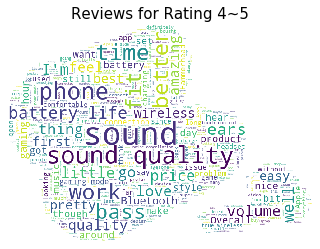

<Figure size 4000x2000 with 0 Axes>

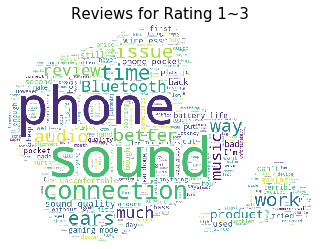

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import os
from nltk.corpus import stopwords 

#input and arrange data
my_data=pd.read_csv('Razer Hammerhead True Wireless EarphonesReviews.csv')
my_data.dropna(subset=['Review Content'], inplace=True)
high=my_data[my_data['Review Rating']>=4] # store the reviews from rating 4~5
text=high['Review Content']
text='\n'.join(text) # merge all reviews into one string
text.lower() # turn all characters into lowercase
# replace special marks
text.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace(',','').replace('.','').replace('「','').replace('」','').replace('（','').replace('）','').replace('!','').replace('?','').replace('、','').replace('▲','').replace('…','').replace(':','').replace('(','').replace(')','').replace('"','').replace('\n','')

#input the list of stopwords from NLTK package
stopwords=stopwords.words('english')

# self-enter other stopwords
stopwords=set(stopwords).union(["I've","could","being","other","after","were","from","Left","JLab","being","pair","only","about","using","than","off","even","use","one","which","and","an","also","great","will","buds","do","get","there","very","me","don't","case","right","good","headphones","out","had","bud","no","earbuds","earbud","headphone","your","all","would","like","at","airpods","airpod","was","Razer","can","when","really","if","this","them","my","the","and","of","you","a","with","but","as","be","in","on","are","is","or","are","to","it","for","that","they","these","just","have","not","ear","so"])

# set the shape of word cloud
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(os.path.join(d, "Razer.jpg")))

# set the style of world cloud
wc = WordCloud(background_color="white", # background color
               max_words = 2000 ,        # maximum numbers of words displayed
               stopwords=stopwords, # set stopwords
              mask=mask) # set shape
 
# generate world cloud directly from text
wc.generate_from_text(text)
 
# display the figure
plt.title("Reviews for Rating 4~5",size=15)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(20,10), dpi =200)
plt.show()

low=my_data[my_data['Review Rating']<3] # store the reviews from rating 1~3
text=low['Review Content']
text='\n'.join(text)
text.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace(',','').replace('.','').replace('「','').replace('」','').replace('（','').replace('）','').replace('!','').replace('?','').replace('、','').replace('▲','').replace('…','').replace(':','').replace('(','').replace(')','').replace('"','').replace('\n','')

# set the style of world cloud
wc = WordCloud(background_color="white", # background color
               max_words = 2000 ,        # maximum numbers of words displayed
               stopwords=stopwords, # set stopwords
              mask=mask)     # set shape      
 
# generate world cloud directly from text
wc.generate_from_text(text)

# display the figure
plt.title("Reviews for Rating 1~3",size=15)
plt.axis('off')
plt.imshow(wc)
plt.show()